Shashank Mysore Girish,
Roshan Rayala Bhaskar

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# remove infrequent words. you can play with this parameter as it will likely impact model quality
num_words = 20000
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
# look at some sequences. words have been replaced with arbitrary index mappings
# 1 is a special "beginning of sequence" marker
# infrequent words have been replaced by the index 2
# actual words start with index 4, 3 is never used (???)
train_sequences[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
# labels are simply binary: sentiment can be positive or negative
train_labels[:3]

array([1, 0, 0])

In [5]:
# to restore words, load the word-to-index mapping
word_to_index = tf.keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
# invert to get index-to-word mapping
index_to_word = dict((index, word) for (word, index) in word_to_index.items())
index_to_word_sorted = dict(sorted(index_to_word.items()))


In [7]:
#Index 0: Reserved for padding. Sequences are padded to have a consistent length, and index 0 is used for padding tokens.

#Index 1: Reserved for the start of the sequence. It marks the beginning of a sequence of words.

#Index 2: Reserved for out-of-vocabulary (OOV) or unknown words. If a word is not part of the vocabulary, it is represented by this index.



In [8]:
# we can convert a sequence to text by
# - replacing each index by the respective word
# - joining words together via spaces
# note that we remove the beginning of sequence character and we have to subtract 3 from all indices
# this is because, as mentioned above, the smallest indices are reserved for special characters
# but for some reason this is not reflected in the mapping...
" ".join([index_to_word.get(index - 3 , "UNKNOWN") for index in train_sequences[0][1:]])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNKNOWN is an amazing actor and now the same being director UNKNOWN father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the UNKNOWN of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pr

In [9]:
# we cannot create a dataset :( this is because sequences are different length
# but tensors have to be "rectangular"
#train_data = tf.data.Dataset.from_tensor_slices(train_sequences, train_labels)

In [10]:
# solution is padding all sequences to the maximum length.
# first find the maximum length
sequence_lengths = [len(sequence) for sequence in train_sequences]
sequence_lengths
max_len = max(sequence_lengths)
max_len


2494

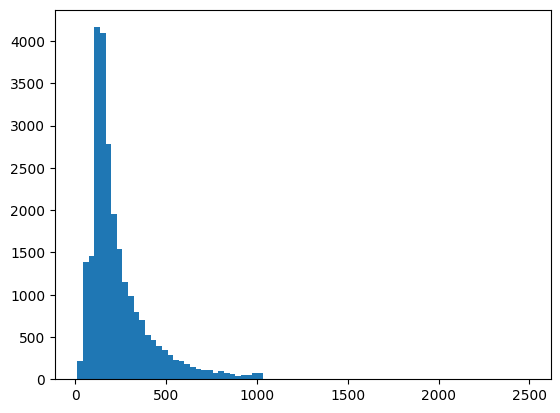

In [11]:
# overview over sequence lengths in the data
# could also look at mean, median, standard deviation...
plt.hist(sequence_lengths, bins=80)
plt.show()

In [12]:
# luckily there is a convenient function for padding
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)


In [13]:
test_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)


In [14]:
# now we can create a dataset!
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

In [15]:
# now we can create a dataset!
test_data = tf.data.Dataset.from_tensor_slices((test_sequences_padded, train_labels))

In [16]:
# all sequences are... very long
train_sequences_padded.shape

(25000, 2494)

In [17]:
# all sequences are... very long
test_sequences_padded.shape

(25000, 2494)

In [18]:
batch = 128
train_data_pad = tf.data.Dataset.from_tensor_slices((train_sequences_padded,train_labels)).batch(batch,drop_remainder=True).repeat()
test_data_pad = tf.data.Dataset.from_tensor_slices((test_sequences_padded,test_labels)).batch(batch,drop_remainder=True)

In [19]:
# for fun, you can look at the word-index mappings.
# in this case, the mapping was done according to word frequency.
# you can pass reverse=True to sorted() to look at the least common words.
sorted_index_to_word = dict(sorted(index_to_word.items(), reverse=True)[:50000])


In [20]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy_metric = tf.metrics.SparseCategoricalAccuracy()
optimizer = tf.optimizers.Adam()
hidden_size = 64
train_steps = 2000
output_size = 2


In [21]:
W_xh = tf.Variable(tf.random.normal([hidden_size, num_words]))
W_hh = tf.Variable(tf.random.normal([hidden_size, hidden_size]))
W_ho = tf.Variable(tf.random.normal([output_size, hidden_size]))

b_h = tf.Variable(tf.zeros([hidden_size, 1]))
b_o = tf.Variable(tf.zeros([output_size, 1]))

variables = [W_xh, W_hh, W_ho, b_h, b_o]


In [22]:
def train_loop():

  try:

    for step, (batches_of_sequence, labels_of_batch) in enumerate(train_data_pad):

      if step > train_steps:
        break

      else:
        with tf.GradientTape() as tape:
          #we are doing the GD with batches and not every sequence.
          logits = rnn_loop(batches_of_sequence)
          loss = loss_fn( labels_of_batch, tf.transpose(logits) )

        gradient = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(gradient, variables))
        accuracy_metric(labels_of_batch, tf.transpose(logits))

      if not step % 100:
              print("Step:{} Loss: {} Accuracy: {}".format(step, loss, accuracy_metric.result()))
              accuracy_metric.reset_states()

  except Exception as e:
    print(str(e))

#we are doing a_t and h_t according to text book
def rnn_step(previous_state, input):

  new_state = tf.matmul(W_hh, previous_state) + tf.matmul(W_xh, tf.transpose(input)) + b_h
  new_state = tf.nn.tanh(new_state)
  return new_state

#now we calculate o_t
@tf.function
def rnn_loop(sequence):

  old_state = tf.zeros([hidden_size, batch], tf.float32)  # initial state

  #we get the entire batch of data, 128 sequences
  for step in tf.range(200):
    # iterating through each sequence in a batch.
    x_t = sequence[:, step]
    # we encode the entire sequence at once
    x_t = tf.one_hot(x_t, depth=num_words)
    #now we are passing this hidden state to the next input
    #print('hello')
    new_state = rnn_step(old_state, x_t)
    #so in this new state we have the linear function and non linear (tanh)
    old_state = new_state
    #now we consider this as old state as this should be sent to the next hidden, hidden to hidden is RNN

  #so after all the sequences are processed we calculate the output, in this case sentiment
  o_t = output_layer(new_state)
  return o_t
  #we need the output and hence we return output

def output_layer(state):
    return tf.matmul(W_ho, state) + b_o



In [23]:
train_loop()

Step:0 Loss: 3.3307318687438965 Accuracy: 0.578125
Step:100 Loss: nan Accuracy: 0.4945312440395355
Step:200 Loss: nan Accuracy: 0.5051562786102295
Step:300 Loss: nan Accuracy: 0.49390625953674316
Step:400 Loss: nan Accuracy: 0.507031261920929
Step:500 Loss: nan Accuracy: 0.4950000047683716
Step:600 Loss: nan Accuracy: 0.5028125047683716
Step:700 Loss: nan Accuracy: 0.49812498688697815
Step:800 Loss: nan Accuracy: 0.5018749833106995
Step:900 Loss: nan Accuracy: 0.5000781416893005
Step:1000 Loss: nan Accuracy: 0.4987500011920929
Step:1100 Loss: nan Accuracy: 0.5010937452316284
Step:1200 Loss: nan Accuracy: 0.4998437464237213
Step:1300 Loss: nan Accuracy: 0.4984374940395355
Step:1400 Loss: nan Accuracy: 0.5007030963897705
Step:1500 Loss: nan Accuracy: 0.4998437464237213
Step:1600 Loss: nan Accuracy: 0.5010156035423279
Step:1700 Loss: nan Accuracy: 0.5
Step:1800 Loss: nan Accuracy: 0.4991406202316284
Step:1900 Loss: nan Accuracy: 0.5016406178474426
Step:2000 Loss: nan Accuracy: 0.499843746

In [24]:
for sequence_batch, label_batch in test_data_pad:
    accuracy_metric(label_batch, tf.transpose(rnn_loop(sequence_batch)))
print("Test acc: {}".format(accuracy_metric.result()))

Test acc: 0.5001201629638672
